### Import libraries

In [1]:
import pandas as pd
import numpy as np

### Read the data set

In [2]:
data_1=pd.read_csv(r"C:\Users\Reyuvel K Kunjumon\OneDrive\Desktop\StockProphet\1.1\BAJFINANCE.csv")

In [3]:
data_1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


to find number of rows and columns for just an overview of data use shape().it returns (no:rows, no"column)

In [4]:
data_1.shape

(5070, 15)

## this is time series data.So let"s make date as the index of the data

In [5]:
data_1.set_index('Date',inplace=True)

# to check what is the trend of the volume weight average price

<Axes: xlabel='Date'>

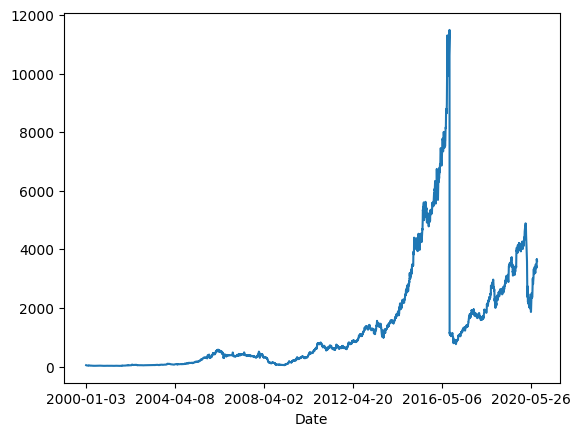

In [6]:
data_1['VWAP'].plot()

## check for any missing values

In [7]:
data_1.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

from the above data et it is clear that the columns trades,deliverable volume, %Deliverable have missing values.The rule is to delete the null values if the %of missing values is less 5.

## if you want to check the % of null data,see below


In [8]:
no_rows=data_1.shape[0]
no_null_of_deliverable=data_1['%Deliverble'].isnull().sum()
percent_of_deliverable_missing_value=(no_null_of_deliverable/no_rows)*100
percent_of_deliverable_missing_value

8.796844181459566

and now for our convenience we will delete all the missing value rows


In [9]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

all the missing value rows are deleted


In [10]:
data_1.shape

(2291, 14)

In [11]:
data_2=data_1

### Feature Engineering Works

In [12]:
data_2.dtypes #to see the datatypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [13]:
data_2.columns # to ee the kist of columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

### next we are gonna makew use of rolling sum to get a good insight on the data

In [14]:
lag_features = ['High','Low','Last','Turnover','Trades']
window1=3
window2=7

In [15]:
# iterate through all the above mentioned columns to find rolling mean with two type of rolling windows 3 and 7
for feature in lag_features:
    data_2[feature + 'rolling_mean_3']=data_2[feature].rolling(window1).mean()
    data_2[feature + 'rolling_mean_7']=data_2[feature].rolling(window2).mean()

In [16]:
# iterate through all the above mentioned columns to find rolling std deviation with two types of rolling windows 3 and 7
for feature in lag_features:
    data_2[feature + 'rolling_std_3']=data_2[feature].rolling(window1).std()
    data_2[feature + 'rolling_std_7']=data_2[feature].rolling(window2).std()

In [17]:
data_2.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Lastrolling_mean_3',
       'Lastrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Lastrolling_std_3',
       'Lastrolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [18]:
data_2.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Lastrolling_std_3,Lastrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,5.567764,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,11.326554,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,6.033725,NaN,1.652377e+12,NaN,78.270897,NaN


In [19]:
data_2.shape

(2291, 34)

### here null values came.delete those null values

In [20]:
data_2.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Lastrolling_mean_3        2
Lastrolling_mean_7        6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Lastrolling_std_3         2
Lastrolling_std_7         6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [21]:
data_2.dropna(inplace=True)

In [22]:
data_2.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        0
Highrolling_mean_7        0
Lowrolling_mean_3         0
Lowrolling_mean_7         0
Lastrolling_mean_3        0
Lastrolling_mean_7        0
Turnoverrolling_mean_3    0
Turnoverrolling_mean_7    0
Tradesrolling_mean_3      0
Tradesrolling_mean_7      0
Highrolling_std_3         0
Highrolling_std_7         0
Lowrolling_std_3          0
Lowrolling_std_7          0
Lastrolling_std_3         0
Lastrolling_std_7         0
Turnoverrolling_std_3     0
Turnoverrolling_std_7     0
Tradesrolling_std_3       0
Tradesrolling_std_7       0
dtype: int64

In [23]:
data_2.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Lastrolling_mean_3',
       'Lastrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Lastrolling_std_3',
       'Lastrolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [24]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Lastrolling_mean_3',
       'Lastrolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Lastrolling_std_3',
       'Lastrolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [25]:
#now  i divide the data into two sets.training data and test_data

training_data=data_2[0:1800]
test_data=data_2[1800:]

In [26]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Lastrolling_std_3,Lastrolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,6.961741,8.089551,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,6.290138,8.213628,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,4.734536,7.106922,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,0.925113,7.141512,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,9.831116,8.999014,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,88.954937,79.489416,83.341306,107.041856,71.776528,105.853747,1.827289e+14,1.673270e+14,2794.744413,21708.856675
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,63.129081,100.594924,24.113551,119.854378,22.060277,116.276260,1.375623e+14,1.467744e+14,21770.352164,17267.163548
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,23.818183,113.135709,8.146779,118.187686,38.040121,122.556401,2.020435e+14,1.561692e+14,30923.312263,24013.596897


In [27]:

#to impplement arima on the data install the pmdarima library
!pip install pmdarima
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training_data['VWAP'], order=(2, 0, 2), exog=training_data[ind_features])
model_fit = model.fit()  # No need for disp argument


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: Use

In [29]:
model_fit = model.fit()


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
forecasted_values = model_fit.forecast(steps=len(test_data), exog=test_data[ind_features])


C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
test_data['Forecast_ARIMA']=forecasted_values.values

C:\Users\Reyuvel K Kunjumon.JESUS\AppData\Local\Temp\ipykernel_20916\3197935077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Forecast_ARIMA']=forecasted_values.values


<Axes: xlabel='Date'>

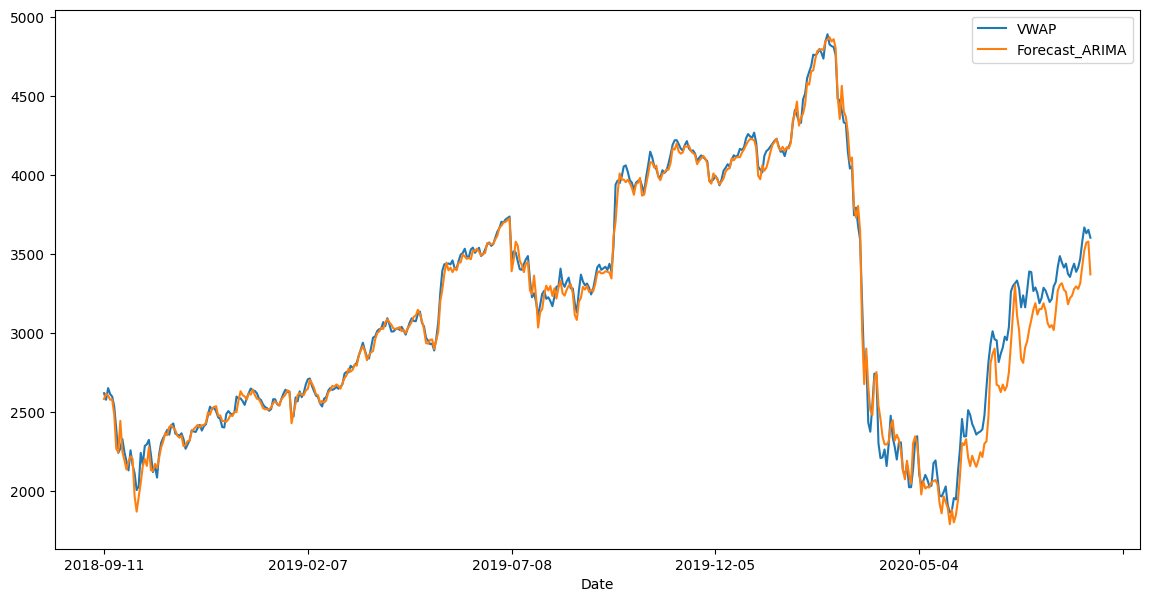

In [32]:
# Print the first 5 elements of the forecast
test_data[['VWAP' , 'Forecast_ARIMA']].plot(figsize=(14,7))



In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("The mean squared error is:")
print(np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA'])))

print("TThe mean absolute error is:")
print(mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

The mean squared error is:
92.84235457132809
TThe mean absolute error is:
59.18015358598711


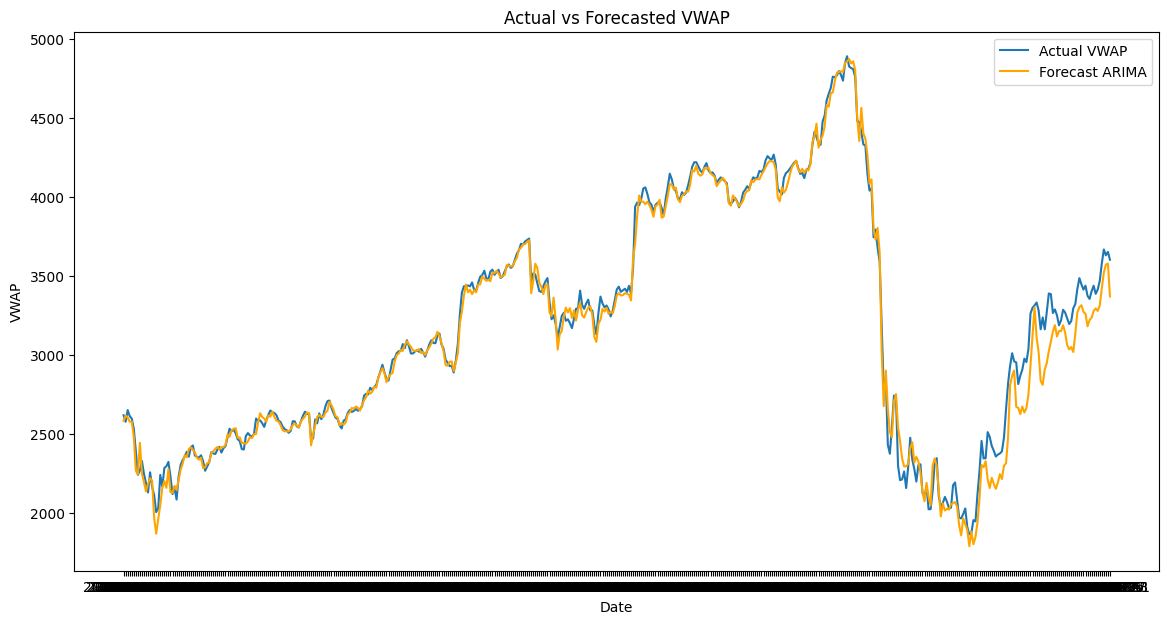

In [34]:
import matplotlib.pyplot as plt

# Plotting the actual VWAP values
plt.figure(figsize=(14,7))
plt.plot(test_data.index, test_data['VWAP'], label='Actual VWAP')

# Plotting the forecasted values
plt.plot(test_data.index, test_data['Forecast_ARIMA'], label='Forecast ARIMA', color='orange')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.title('Actual vs Forecasted VWAP')
plt.legend()

# Display the plot
plt.show()


In [35]:
import sys
print(sys.version)

3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]


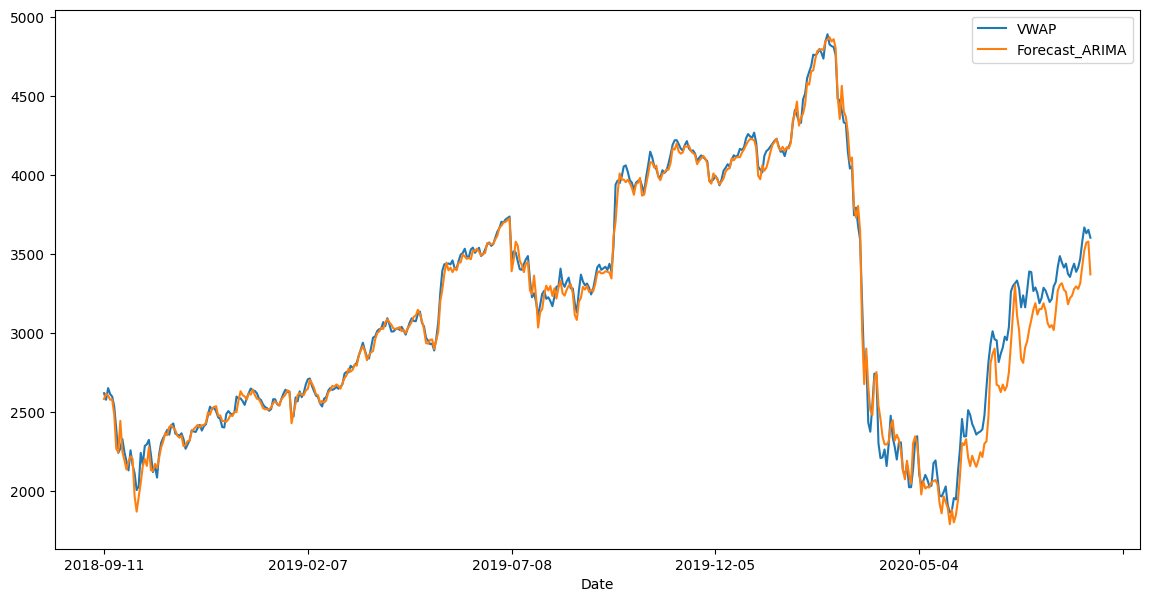

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,7))
test_data[['VWAP' , 'Forecast_ARIMA']].plot(ax=ax)  # Use the created axes object
plt.show()
